In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [2]:
df = pd.read_json("merged-data.json")
df.describe()

,building_type,collection_set,level,listing_no,private_seller,rent,rent_extra,rent_full,rooms,surface
count,1610.000000,1610.000000,1549.000000,1610.000000,1405.0,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,3.877019,4.522360,2.891543,1392.845342,1.0,2717.627329,1154.311801,3871.939130,1.980745,42.916149
std,1.039209,2.411091,2.673173,997.367606,0.0,768.719639,14375.714717,14406.090679,0.676519,13.827079
min,0.000000,1.000000,0.000000,1.000000,1.0,100.000000,0.000000,101.000000,1.000000,1.000000
25%,4.000000,3.000000,1.000000,510.250000,1.0,2300.000000,386.250000,2750.000000,2.000000,35.000000
50%,4.000000,4.000000,2.000000,1223.500000,1.0,2700.000000,500.000000,3150.000000,2.000000,42.000000
75%,4.000000,6.750000,4.000000,2255.000000,1.0,3000.000000,600.000000,3600.000000,2.000000,50.000000
max,6.000000,9.000000,11.000000,3499.000000,1.0,12000.000000,450650.000000,453650.000000,4.000000,170.000000


In [3]:
df.isna().sum()

building_type       0
collection_set      0
furnished           0
level              61
link                0
listing_no          0
negotiable          0
private_seller    205
publish_date        0
rent                0
rent_extra          0
rent_full           0
rooms               0
surface             0
title               0
dtype: int64

<Axes: >

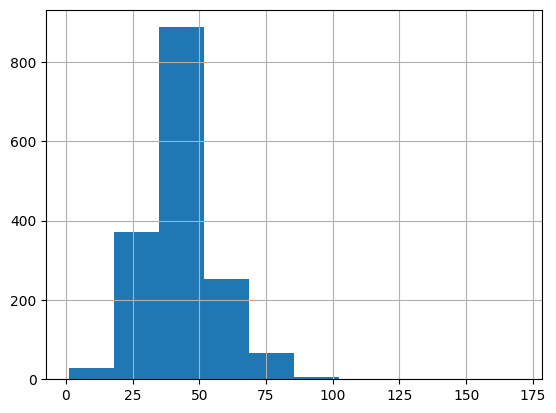

In [4]:
df["surface"].hist()

In [5]:
df.dtypes

building_type       int64
collection_set      int64
furnished            bool
level             float64
link               object
listing_no          int64
negotiable           bool
private_seller    float64
publish_date       object
rent                int64
rent_extra          int64
rent_full           int64
rooms               int64
surface             int64
title              object
dtype: object

In [6]:
df = df.where((df['rent'] > 1000) & (df['rent'] < 6000)
                      & (df['rent_extra'] < 999) )

In [7]:
df = df.dropna(axis=0, how="all", inplace=False)
df = df.drop(labels=["private_seller"], axis=1)

In [8]:
df = df.dropna(subset=["level"])

In [9]:
df.describe()

,building_type,collection_set,level,listing_no,rent,rent_extra,rent_full,rooms,surface
count,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000
mean,3.894158,4.510653,2.935395,1387.028179,2724.537457,478.302405,3202.839863,1.965636,42.581443
std,1.023688,2.397498,2.684707,991.557264,628.473953,183.520904,690.718705,0.662558,12.832111
min,0.000000,1.000000,0.000000,2.000000,1100.000000,0.000000,1201.000000,1.000000,8.000000
25%,4.000000,3.000000,1.000000,503.500000,2325.000000,390.000000,2787.500000,2.000000,35.000000
50%,4.000000,4.000000,2.000000,1232.000000,2700.000000,500.000000,3150.000000,2.000000,42.000000
75%,4.000000,6.000000,4.000000,2237.500000,3000.000000,600.000000,3520.000000,2.000000,50.000000
max,6.000000,9.000000,11.000000,3499.000000,5950.000000,980.000000,6600.000000,4.000000,120.000000


<Axes: >

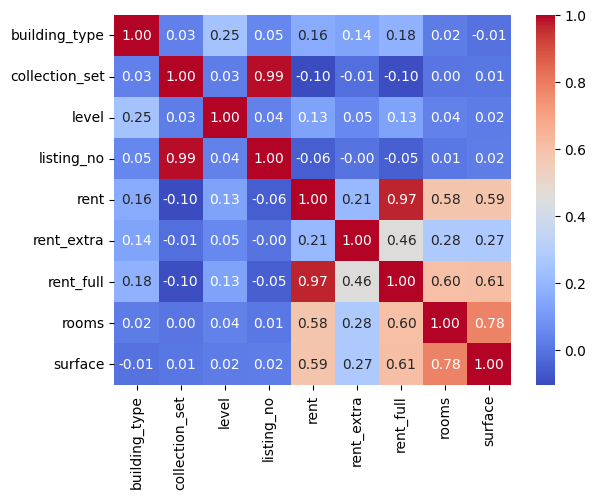

In [10]:
corr = df.corr(numeric_only=True)

sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=',.2f')

In [11]:
df.head()

,building_type,collection_set,furnished,level,link,listing_no,negotiable,publish_date,rent,rent_extra,rent_full,rooms,surface,title
1,4.0,1.0,True,8.0,https://www.olx.pl/d/oferta/mieszkanie-3-pokoj...,2.0,False,2022-09-03,3200.0,570.0,3770.0,3.0,46.0,Mieszkanie 3 pokojowe na Przymorzu dla student...
2,4.0,1.0,True,3.0,https://www.olx.pl/d/oferta/zabi-kruk-studio-a...,3.0,False,2022-09-03,2500.0,300.0,2800.0,1.0,20.0,Żabi Kruk Studio Apartament z Balkonem Kawaler...
3,2.0,1.0,True,0.0,https://www.olx.pl/d/oferta/mieszkanie-dwupoko...,4.0,False,2022-09-03,2000.0,260.0,2260.0,2.0,38.0,Mieszkanie dwupokojowe z ogródkiem wynajmę
4,4.0,1.0,True,3.0,https://www.olx.pl/d/oferta/wynajme-2-pokojowe...,5.0,False,2022-09-03,2000.0,450.0,2450.0,2.0,41.0,Wynajme 2-pokojowe mieszkanie w centrum miasta
5,4.0,1.0,True,4.0,https://www.olx.pl/d/oferta/do-wynajecia-miesz...,6.0,False,2022-09-03,2500.0,424.0,2924.0,2.0,35.0,Do wynajęcia mieszkanie 35 m.kw. Zajezdnia Gdańsk


In [12]:
df["publish_date"].max()

'2022-11-02'

In [13]:
day = df["publish_date"].str.split("-").str[-1].astype(int)
month = df["publish_date"].str.split("-").str[-2].astype(int)

final = day + ((month - 9) * 30)
df["collecting_day"] = final

In [14]:
df.head()

,building_type,collection_set,furnished,level,link,listing_no,negotiable,publish_date,rent,rent_extra,rent_full,rooms,surface,title,collecting_day
1,4.0,1.0,True,8.0,https://www.olx.pl/d/oferta/mieszkanie-3-pokoj...,2.0,False,2022-09-03,3200.0,570.0,3770.0,3.0,46.0,Mieszkanie 3 pokojowe na Przymorzu dla student...,3
2,4.0,1.0,True,3.0,https://www.olx.pl/d/oferta/zabi-kruk-studio-a...,3.0,False,2022-09-03,2500.0,300.0,2800.0,1.0,20.0,Żabi Kruk Studio Apartament z Balkonem Kawaler...,3
3,2.0,1.0,True,0.0,https://www.olx.pl/d/oferta/mieszkanie-dwupoko...,4.0,False,2022-09-03,2000.0,260.0,2260.0,2.0,38.0,Mieszkanie dwupokojowe z ogródkiem wynajmę,3
4,4.0,1.0,True,3.0,https://www.olx.pl/d/oferta/wynajme-2-pokojowe...,5.0,False,2022-09-03,2000.0,450.0,2450.0,2.0,41.0,Wynajme 2-pokojowe mieszkanie w centrum miasta,3
5,4.0,1.0,True,4.0,https://www.olx.pl/d/oferta/do-wynajecia-miesz...,6.0,False,2022-09-03,2500.0,424.0,2924.0,2.0,35.0,Do wynajęcia mieszkanie 35 m.kw. Zajezdnia Gdańsk,3


In [15]:
df_to_model = df.drop(labels=["collection_set", "listing_no", "link", "title", "publish_date", ], axis=1)

<Axes: >

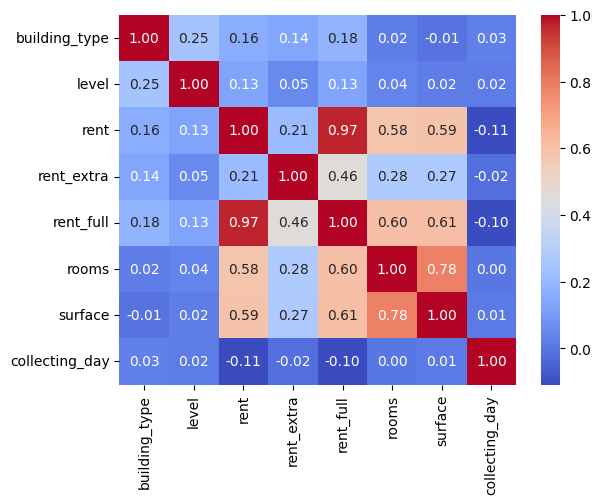

In [16]:
corr = df_to_model.corr(numeric_only=True)

sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=',.2f')

In [17]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from math import sqrt
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import pprint

In [18]:
df_to_model.columns

Index(['building_type', 'furnished', 'level', 'negotiable', 'rent',
       'rent_extra', 'rent_full', 'rooms', 'surface', 'collecting_day'],
      dtype='object')

In [19]:
df_to_model

,building_type,furnished,level,negotiable,rent,rent_extra,rent_full,rooms,surface,collecting_day
1,4.0,True,8.0,False,3200.0,570.0,3770.0,3.0,46.0,3
2,4.0,True,3.0,False,2500.0,300.0,2800.0,1.0,20.0,3
3,2.0,True,0.0,False,2000.0,260.0,2260.0,2.0,38.0,3
4,4.0,True,3.0,False,2000.0,450.0,2450.0,2.0,41.0,3
5,4.0,True,4.0,False,2500.0,424.0,2924.0,2.0,35.0,3
...,...,...,...,...,...,...,...,...,...,...
1605,4.0,True,3.0,True,2600.0,200.0,2800.0,2.0,50.0,59
1606,5.0,True,2.0,False,2900.0,500.0,3400.0,2.0,46.0,60
1607,5.0,True,3.0,True,2900.0,600.0,3500.0,2.0,50.0,58
1608,6.0,True,4.0,False,2700.0,500.0,3200.0,2.0,50.0,58


In [20]:
# X = df_to_model[[
#     'building_type', 'furnished', 'level', 'negotiable', 'private_seller',
#     'rent', 'rent_extra', 'rooms', 'surface', 'collecting_day']]

X = df_to_model[[
    'building_type', 'furnished', 'level', 'negotiable', 'rent_extra', 'rooms', 
    'surface', 'collecting_day']]

y = df_to_model["rent_full"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=666)

model = LinearRegression()
model.fit(X, y)

print("Coef: ", model.coef_)
print("Intercept: ", model.intercept_ ,end="\n\n")

y_pred = model.predict(X_test)

print("MAE Regression: ", mean_absolute_error(y_test, y_pred))
print("R2_ Regression: ", r2_score(y_test, y_pred))
print("RMSE Regression: ", sqrt(mean_squared_error(y_test, y_pred)))


Coef:  [ 85.85718869 428.08839414  18.51149015  43.46240779   1.01309829
 280.5166658   17.41463669  -3.90055457]
Intercept:  702.823769858469

MAE Regression:  322.275288503254
R2_ Regression:  0.5777369075234888
RMSE Regression:  458.000409017425


In [21]:
from sklearn.model_selection import GridSearchCV

X = df_to_model[[    'building_type', 'furnished', 'level', 'negotiable', 'rent_extra',     'rooms', 'surface', 'collecting_day']]
y = df_to_model["rent_full"]

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

model = DecisionTreeRegressor()

# define the hyperparameter grid to search
param_grid = {
    'max_depth': range(1, 10),
    'min_samples_leaf': range(1, 10),
}

# perform grid search
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# get the best estimator
best_estimator = grid_search.best_estimator_

# predict on the validation set
y_pred_val = best_estimator.predict(X_val)

# predict on the test set
y_pred_test = best_estimator.predict(X_test)

# predict on the train set
y_pred_train = best_estimator.predict(X_train)

print(grid_search.best_estimator_, end="\n\n")

# print the train, validation, and test scores
print("Train Scores:")
print("MAE: ", mean_absolute_error(y_train, y_pred_train))
print("R2: ", r2_score(y_train, y_pred_train))
print("RMSE: ", sqrt(mean_squared_error(y_train, y_pred_train)), end="\n\n")

print("Validation Scores:")
print("MAE: ", mean_absolute_error(y_val, y_pred_val))
print("R2: ", r2_score(y_val, y_pred_val))
print("RMSE: ", sqrt(mean_squared_error(y_val, y_pred_val)), end="\n\n")

print("Test Scores:")
print("MAE: ", mean_absolute_error(y_test, y_pred_test))
print("R2: ", r2_score(y_test, y_pred_test))
print("RMSE: ", sqrt(mean_squared_error(y_test, y_pred_test)))


DecisionTreeRegressor(max_depth=6, min_samples_leaf=9)

Train Scores:
MAE:  307.3204311415536
R2:  0.6256985041553149
RMSE:  417.32919334711204

Validation Scores:
MAE:  353.43674476891033
R2:  0.4940492976625882
RMSE:  520.1632160561956

Test Scores:
MAE:  353.7362598015962
R2:  0.47718774383562235
RMSE:  483.2744138972986


In [22]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
# from math import sqrt

# # Define the input features and target variable
# X = df_to_model[[
#     'building_type', 'furnished', 'level', 'negotiable', 'rent_extra', 
#     'rooms', 'surface', 'collecting_day']]

# y = df_to_model["rent_full"]

# # Split the dataset into training, validation, and test sets
# X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# # Define the Random Forest model
# model = RandomForestRegressor(random_state=420)

# # Define the hyperparameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'max_depth': [5, 7, 9, 11, 13, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4, 6, 8]
# }

# # Perform Randomized Search to find the best hyperparameters
# random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=20, cv=5, n_jobs=-1, random_state=42)
# random_search.fit(X_train_val, y_train_val)

# # Train the Random Forest model on the entire training set using the best hyperparameters
# best_model = RandomForestRegressor(**random_search.best_params_, random_state=42)
# best_model.fit(X_train_val, y_train_val)

# # Make predictions on the test set using the best model
# y_pred = best_model.predict(X_test)

# # Evaluate the performance of the best model on the test set
# print("MAE Random Forest: ", mean_absolute_error(y_test, y_pred))
# print("R2_ Random Forest: ", r2_score(y_test, y_pred))
# print("RMSE Random Forest: ", sqrt(mean_squared_error(y_test, y_pred)))

<Axes: >

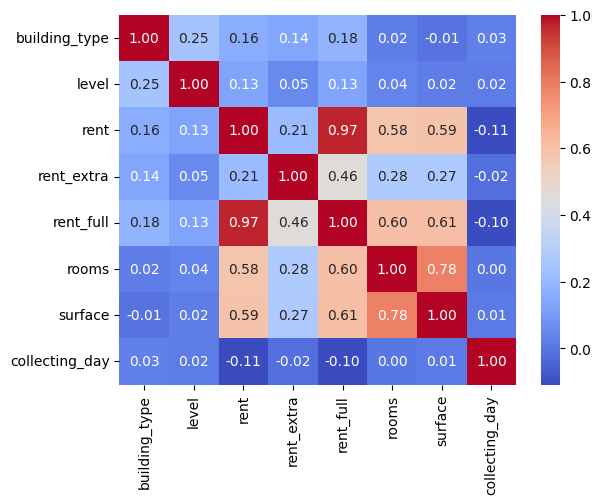

In [23]:
corr = df_to_model.corr(numeric_only=True)

sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=',.2f')

### Experimenting with params to model

- this model does not include: collecting_day, level, and building_type

In [24]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV

# X = df_to_model[['building_type', 'furnished', 'negotiable',
#                  'rent_extra', 'rooms', 'surface']]
# y = df_to_model['rent_full']

# X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# param_grid = {
#     'n_estimators': [500],
#     'max_depth': [15, 30],
#     'min_samples_split': [15],
#     'min_samples_leaf': [1, 4],
#     'max_features': [1.0],
#     'bootstrap': [True]
# }

# rf = RandomForestRegressor(random_state=42)

# grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
# grid_search.fit(X_train_val, y_train_val)

# print("Best parameters: ", grid_search.best_params_)

# model = RandomForestRegressor(
#     n_estimators=grid_search.best_params_['n_estimators'],
#     max_depth=grid_search.best_params_['max_depth'],
#     min_samples_split=grid_search.best_params_['min_samples_split'],
#     min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
#     max_features=grid_search.best_params_['max_features'],
#     random_state=42
# )

# model.fit(X_train, y_train)

# y_pred_train = model.predict(X_train)
# y_pred_val = model.predict(X_val)
# y_pred_test = model.predict(X_test)

# print("Train set:")
# print("MAE: ", mean_absolute_error(y_train, y_pred_train))
# print("R2 score: ", r2_score(y_train, y_pred_train))
# print("RMSE: ", sqrt(mean_squared_error(y_train, y_pred_train)))

# print("\nValidation set:")
# print("MAE: ", mean_absolute_error(y_val, y_pred_val))
# print("R2 score: ", r2_score(y_val, y_pred_val))
# print("RMSE: ", sqrt(mean_squared_error(y_val, y_pred_val)))

# print("\nTest set")
# print("MAE: ", mean_absolute_error(y_test, y_pred_test))
# print("R2 score: ", r2_score(y_test, y_pred_test))
# print("RMSE: ", sqrt(mean_squared_error(y_test, y_pred_test)))

## random forest algorithm 
- most successfull model so far

In [25]:
# BEST SO FAR

# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV

# X = df_to_model[['building_type', 'furnished', 'level', 'negotiable',
#                  'rent_extra', 'rooms', 'surface', 'collecting_day']]
# y = df_to_model['rent_full']

# X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [5, 10, 15],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2']
# }

# rf = RandomForestRegressor(random_state=42)

# grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
# grid_search.fit(X_train_val, y_train_val)

# print("Best parameters: ", grid_search.best_params_)

# model = RandomForestRegressor(
#     n_estimators=grid_search.best_params_['n_estimators'],
#     max_depth=grid_search.best_params_['max_depth'],
#     min_samples_split=grid_search.best_params_['min_samples_split'],
#     min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
#     max_features=grid_search.best_params_['max_features'],
#     random_state=42
# )

# model.fit(X_train, y_train)

# y_pred_train = model.predict(X_train)
# y_pred_val = model.predict(X_val)
# y_pred_test = model.predict(X_test)

# print("Train set:")
# print("MAE: ", mean_absolute_error(y_train, y_pred_train))
# print("R2 score: ", r2_score(y_train, y_pred_train))
# print("RMSE: ", sqrt(mean_squared_error(y_train, y_pred_train)))

# print("\nValidation set:")
# print("MAE: ", mean_absolute_error(y_val, y_pred_val))
# print("R2 score: ", r2_score(y_val, y_pred_val))
# print("RMSE: ", sqrt(mean_squared_error(y_val, y_pred_val)))

# print("\nTest set")
# print("MAE: ", mean_absolute_error(y_test, y_pred_test))
# print("R2 score: ", r2_score(y_test, y_pred_test))
# print("RMSE: ", sqrt(mean_squared_error(y_test, y_pred_test)))